---

# <center> ★ Machine Learning Project - BigMart Sales Prediction ★

---

<img src="bigmart.jpg" style="width: 600px;"/>

---

### Description:

The data scientists at BigMart have collected 2013 sales data for numerous products across many stores in different cities. Also, certain attributes of each product and store have been defined. 

The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Acknowledgement: 
The dataset is taken from Kaggle:\
https://www.kaggle.com/yasserh/bigmartsalesdataset

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales of the products.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [150]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [135]:
#Importing the dataset

df = pd.read_csv('bigmart.csv')

display(df.head())
df.drop(['Item_Identifier'], axis=1, inplace=True)

target = 'Item_Outlet_Sales'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



Inference: The Datset consists of 11 features & 8523 samples.


In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [9]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Fat_Content                5
Outlet_Establishment_Year       9
Outlet_Identifier              10
Item_Type                      16
Item_Weight                   415
Item_Outlet_Sales            3493
Item_MRP                     5938
Item_Visibility              7880
dtype: int64

In [15]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 7 categorical features.


In [16]:
#Checking the stats of all the columns

display(df.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

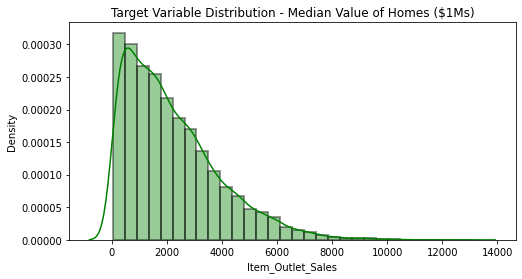

In [17]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around $40000(units)

                               Visualising Categorical Features:                                


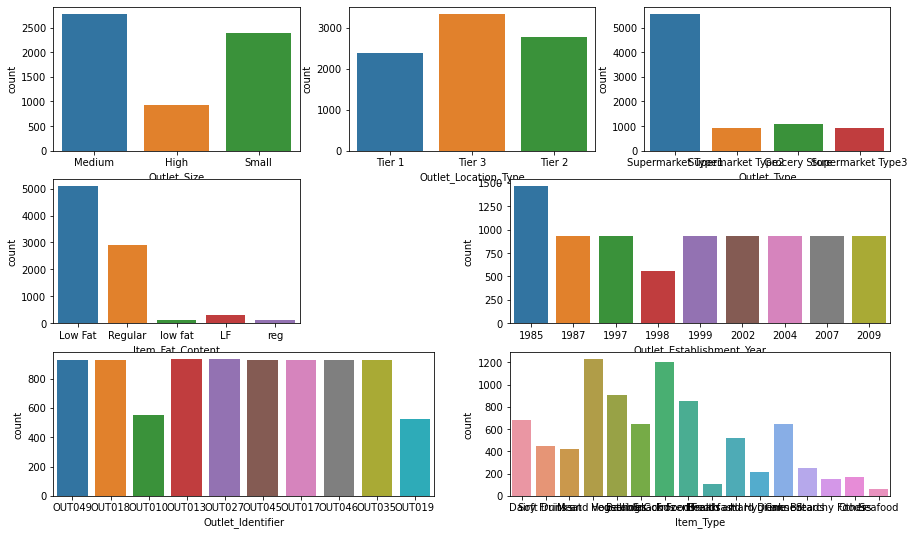

In [26]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,2,i)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

**Inference:** The categorical features distribution can be seen in the above plots.

                                                Numeric Features Distribution                                                 


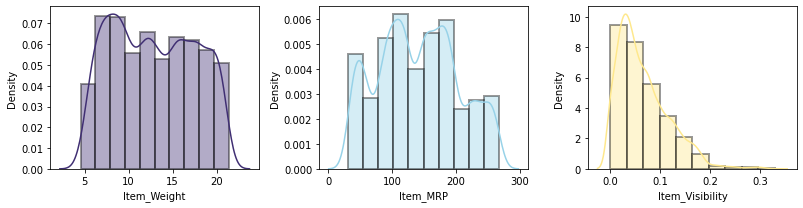

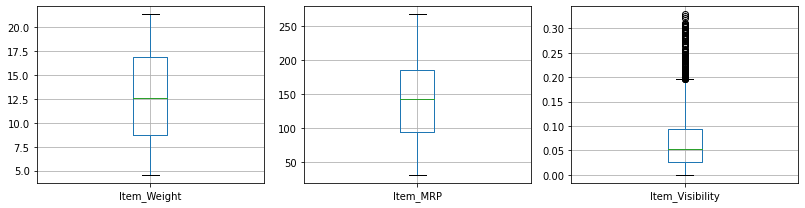

In [28]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

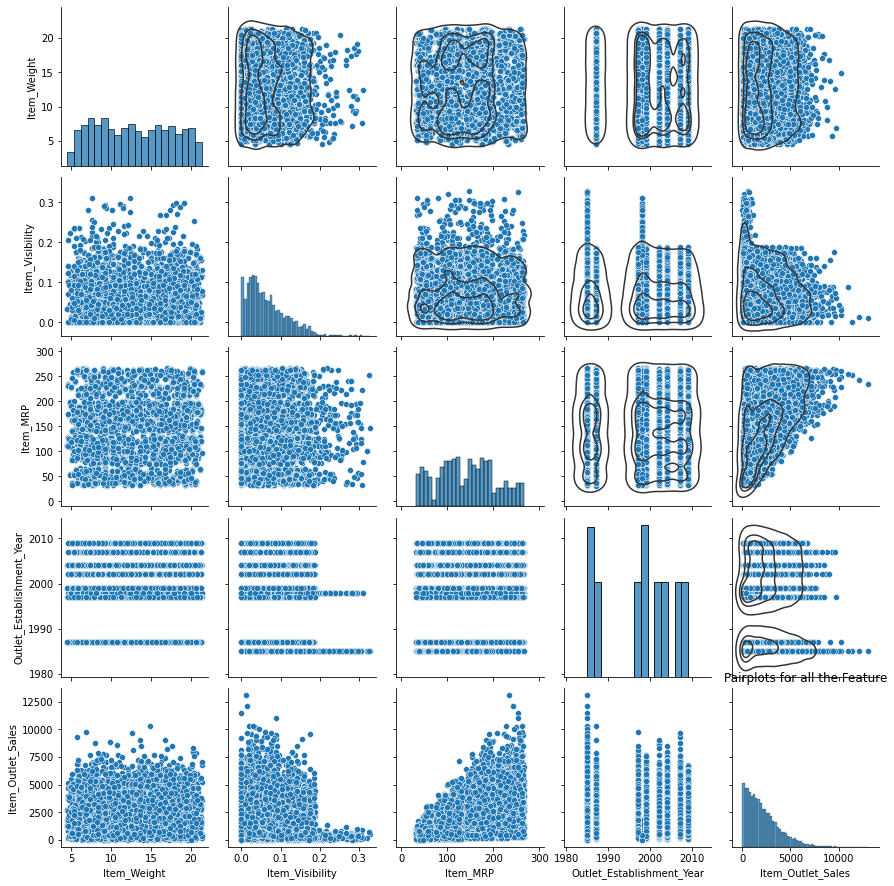

In [29]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [136]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [137]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                           Total Null Values  Percentage
Item_Fat_Content                           0         0.0
Item_Visibility                            0         0.0
Item_Type                                  0         0.0
Item_MRP                                   0         0.0
Outlet_Identifier                          0         0.0
Outlet_Establishment_Year                  0         0.0
Outlet_Location_Type                       0         0.0
Outlet_Type                                0         0.0
Item_Outlet_Sales                          0         0.0
Item_Weight                             1463        17.2
Outlet_Size                             2410        28.3


**Inference:** The datset has 2 columns with inconsistant values. Let us try to fix those.

In [173]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


Dummy Encoding on features:
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Fat_Content
Outlet_Establishment_Year
Outlet_Identifier
Item_Type


(8523, 47)

In [175]:
for x in [i for i in ecc if i in cf]:
    a = df3[x]
    b=[]; c=[]

    df4 = df3.copy()
    df4.drop(ecc, axis=1, inplace=True)
    df4

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    RF = RandomForestClassifier()
    RF.fit(df4.loc[c],a[c])
    d = RF.predict(df4.loc[b])

    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
df1 = df3.copy()
df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,732.3800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [178]:
#Converting categorical Columns to Numeric

df3 = df.copy()

gcc = nvc[nvc['Percentage']!=0].index.values
hcc = [i for i in cf if i not in gcc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in hcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
df3.shape


Dummy Encoding on features:
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Fat_Content
Outlet_Establishment_Year
Outlet_Identifier
Item_Type


(8523, 47)

In [180]:
for x in gcc:
    a = df3[x]
    b=[]; c=[]

    df4 = df3.copy()
    df4.drop([x], axis=1, inplace=True)
    
    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)
        
    LR = LinearRegression()
    LR.fit(df4.loc[c],a[c])
    d = LR.predict(df4.loc[b])
        
    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
df3

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,732.3800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [187]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 8523 samples.
After removal of outliers, The dataset now has 8379 samples.


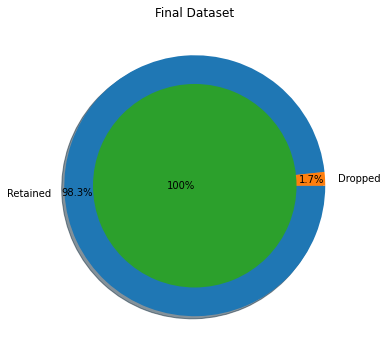


Inference: After the cleanup process, 144 samples were dropped, while retaining 1.69% of the data.


In [189]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [226]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (8379, 46) (8379,) 
Training set  --->  (6703, 46) (6703,) 
Testing set   --->  (1676, 46)  (1676,)


In [227]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,...,Item_Type_Fruits_and_Vegetables,Item_Type_Hard_Drinks,Item_Type_Health_and_Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack_Foods,Item_Type_Soft_Drinks,Item_Type_Starchy_Foods
count,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,...,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03
mean,-5.353186e-17,2.485787e-16,-1.070637e-16,-5.300185e-17,2.968103e-17,6.307220e-17,7.844273e-17,1.727860e-16,-5.936207e-17,4.664162e-17,...,-1.272044e-17,2.332081e-17,1.060037e-18,3.498122e-17,-7.420258e-18,-4.240148e-17,-4.240148e-18,-4.240148e-18,2.968103e-17,7.950277e-19
std,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.957367e+00,-1.370418e+00,-1.749325e+00,-7.105909e-01,-6.141941e-01,-7.060785e-01,-8.033130e-01,-1.418179e+00,-3.528112e-01,-3.562772e-01,...,-4.073597e-01,-1.637303e-01,-2.539196e-01,-3.439258e-01,-2.354238e-01,-1.422798e-01,-8.756065e-02,-4.058649e-01,-2.357765e-01,-1.267593e-01
25%,-8.382911e-01,-7.877224e-01,-7.585243e-01,-7.105909e-01,-6.141941e-01,-7.060785e-01,-8.033130e-01,-1.418179e+00,-3.528112e-01,-3.562772e-01,...,-4.073597e-01,-1.637303e-01,-2.539196e-01,-3.439258e-01,-2.354238e-01,-1.422798e-01,-8.756065e-02,-4.058649e-01,-2.357765e-01,-1.267593e-01
50%,1.493862e-02,-2.255841e-01,3.377996e-02,-7.105909e-01,-6.141941e-01,-7.060785e-01,-8.033130e-01,7.051297e-01,-3.528112e-01,-3.562772e-01,...,-4.073597e-01,-1.637303e-01,-2.539196e-01,-3.439258e-01,-2.354238e-01,-1.422798e-01,-8.756065e-02,-4.058649e-01,-2.357765e-01,-1.267593e-01
75%,7.418581e-01,6.390243e-01,7.236600e-01,1.407280e+00,1.628150e+00,1.416273e+00,1.244845e+00,7.051297e-01,-3.528112e-01,-3.562772e-01,...,-4.073597e-01,-1.637303e-01,-2.539196e-01,-3.439258e-01,-2.354238e-01,-1.422798e-01,-8.756065e-02,-4.058649e-01,-2.357765e-01,-1.267593e-01
max,2.003619e+00,2.873276e+00,2.016433e+00,1.407280e+00,1.628150e+00,1.416273e+00,1.244845e+00,7.051297e-01,2.834377e+00,2.806803e+00,...,2.454833e+00,6.107606e+00,3.938255e+00,2.907604e+00,4.247660e+00,7.028406e+00,1.142066e+01,2.463874e+00,4.241305e+00,7.888970e+00



                                          Standardardization on Testing set                                          


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,...,Item_Type_Fruits_and_Vegetables,Item_Type_Hard_Drinks,Item_Type_Health_and_Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack_Foods,Item_Type_Soft_Drinks,Item_Type_Starchy_Foods
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,0.021421,-0.015503,0.018767,-0.023168,0.021315,-0.003271,-0.004091,-0.024599,0.000898,-0.016567,...,0.026409,-0.029024,0.021223,0.020804,-0.058882,0.003188,-0.018896,-0.006910,-0.006046,0.050199
std,1.009965,1.000884,0.976362,0.991922,1.010825,0.999131,0.999386,1.008733,1.001412,0.979643,...,1.026647,0.909471,1.038454,1.026417,0.872202,1.011212,0.886546,0.993137,0.988094,1.178118
min,-1.957367,-1.370418,-1.732290,-0.710591,-0.614194,-0.706078,-0.803313,-1.418179,-0.352811,-0.356277,...,-0.407360,-0.163730,-0.253920,-0.343926,-0.235424,-0.142280,-0.087561,-0.405865,-0.235776,-0.126759
25%,-0.791122,-0.802363,-0.708637,-0.710591,-0.614194,-0.706078,-0.803313,-1.418179,-0.352811,-0.356277,...,-0.407360,-0.163730,-0.253920,-0.343926,-0.235424,-0.142280,-0.087561,-0.405865,-0.235776,-0.126759
50%,0.034886,-0.232141,0.037229,-0.710591,-0.614194,-0.706078,-0.803313,0.705130,-0.352811,-0.356277,...,-0.407360,-0.163730,-0.253920,-0.343926,-0.235424,-0.142280,-0.087561,-0.405865,-0.235776,-0.126759
75%,0.824403,0.607571,0.696635,1.407280,1.628150,1.416273,1.244845,0.705130,-0.352811,-0.356277,...,-0.407360,-0.163730,-0.253920,-0.343926,-0.235424,-0.142280,-0.087561,-0.405865,-0.235776,-0.126759
max,2.003619,2.859119,2.011638,1.407280,1.628150,1.416273,1.244845,0.705130,2.834377,2.806803,...,2.454833,6.107606,3.938255,2.907604,4.247660,7.028406,11.420656,2.463874,4.241305,7.888970


---

# <center> 5. Feature Selection/Extraction

                             Correlation Matrix                             


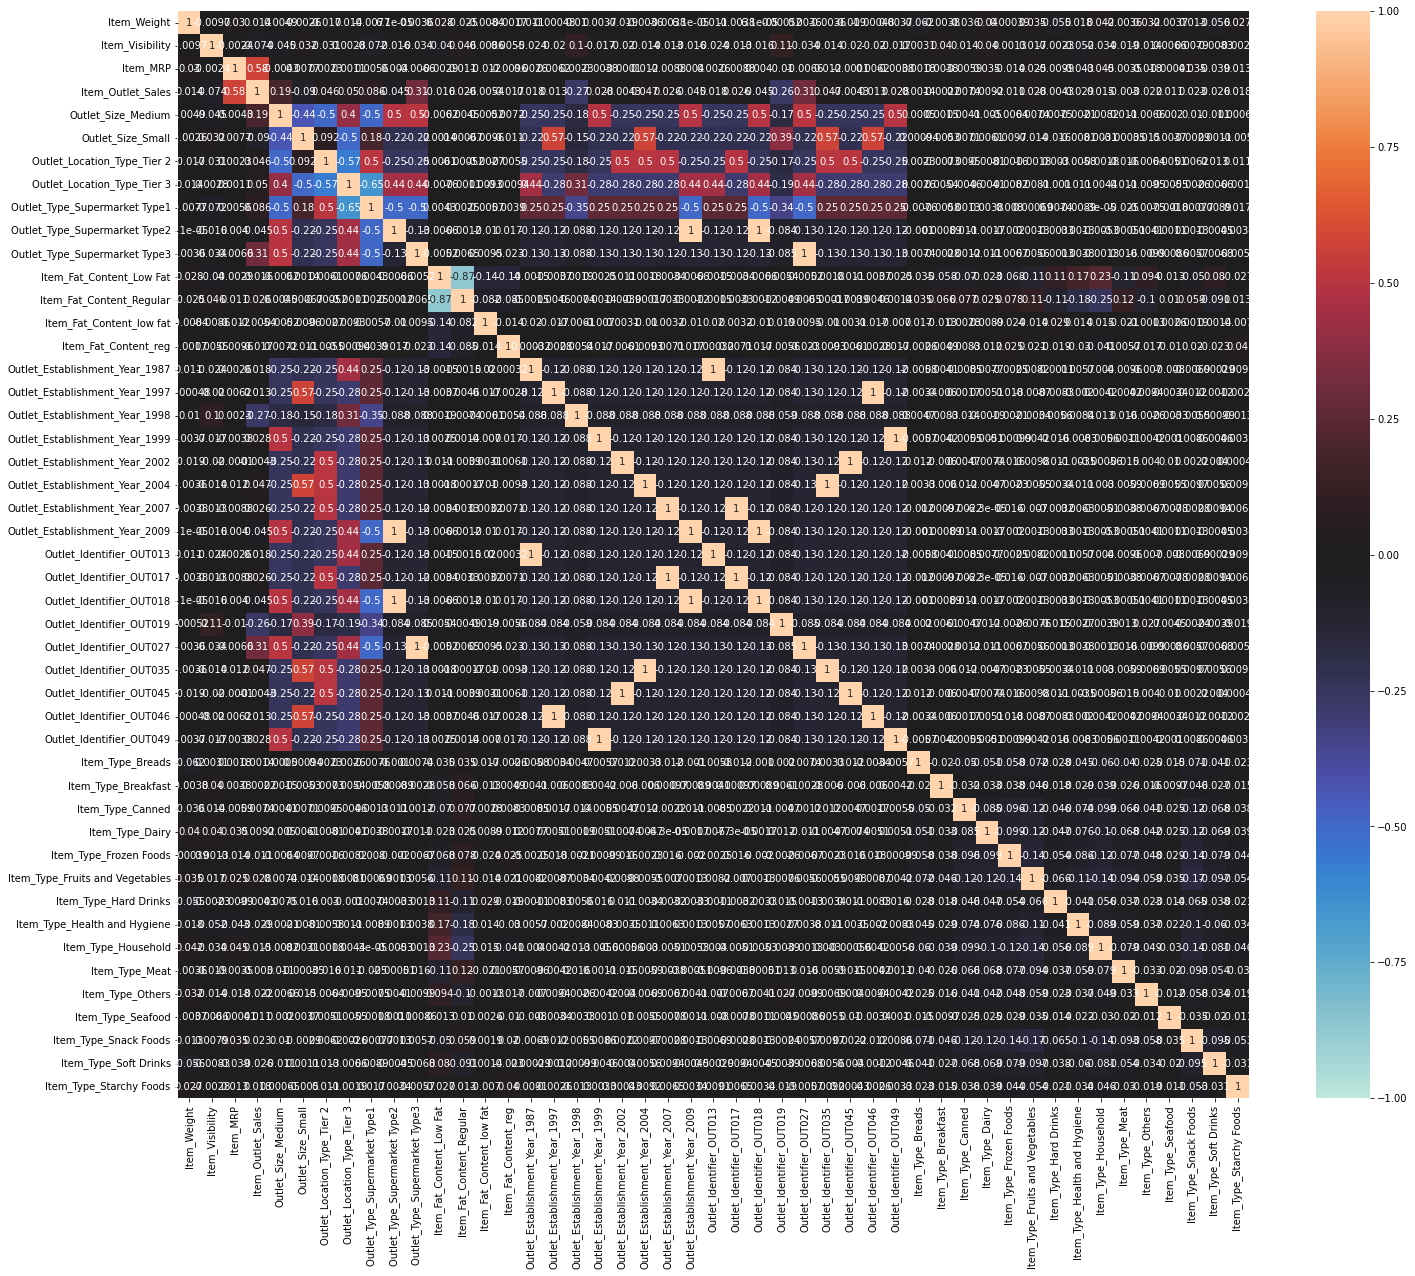

In [192]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(80))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [204]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     269.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:13:02   Log-Likelihood:                -56620.
No. Observations:                6703   AIC:                         1.133e+05
Df Residuals:                    6671   BIC:                         1.135e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2198.6736     13.808    159.234      0.000    2171.606    2225.741
Item_Weight                        -0.5804     13.954     -0.042      0.967     -27.934      26.773
Item_Visibility                   -22.9901     14.051     -1.636      0.102     -50.534       4.554
Item_MRP                          975.5970     13.900     70.185      0.000     948.348    1002.846
Outlet_Size_Medium                158.7002      4.185     37.924      0.000     150.497     166.904
Outlet_Size_Small                 -52.1309      4.573    -11.399      0.000     -61.096     -43.166
Outlet_Location_Type_Tier_2        65.6114      4.003     16.389      0.000      57.764      73.459
Outlet_Location_Type_Tier_3        22.5653      4.078      5.533      0.000      14.571      30.560
Outlet_Type_Supermarket_Type1     129.9282      4.770     27.236      0.000     120.577     139.280
Outlet_Type_Supermarket_Type2     -13.8234      4.027     -3.432      0.001     -21.719      -5.928
Outlet_Type_Supermarket_Type3     251.4386      5.381     46.723      0.000     240.889     261.988
Item_Fat_Content_Low_Fat           47.7288     37.512      1.272      0.203     -25.806     121.263
Item_Fat_Content_Regular           62.1121     37.569      1.653      0.098     -11.534     135.759
Item_Fat_Content_low_fat           12.5567     16.273      0.772      0.440     -19.343      44.456
Item_Fat_Content_reg                4.8832     16.470      0.296      0.767     -27.403      37.169
Outlet_Establishment_Year_1987     40.8294      5.432      7.516      0.000      30.181      51.478
Outlet_Establishment_Year_1997     56.0630      5.508     10.179      0.000      45.266      66.860
Outlet_Establishment_Year_1998   -331.3063     10.542    -31.427      0.000    -351.972    -310.641
Outlet_Establishment_Year_1999     -0.6992      5.069     -0.138      0.890     -10.635       9.237
Outlet_Establishment_Year_2002      7.7357      5.492      1.408      0.159      -3.031      18.503
Outlet_Establishment_Year_2004     58.7752      5.314     11.061      0.000      48.359      69.192
Outlet_Establishment_Year_2007     32.0858      5.530      5.802      0.000      21.246      42.926
Outlet_Establishment_Year_2009    -13.8234      4.027     -3.432      0.001     -21.719      -5.928
Outlet_Identifier_OUT013           40.8294      5.432      7.516      0.000      30.181      51.478
Outlet_Identifier_OUT017           32.0858      5.530      5.802      0.000      21.246      42.926
Outlet_Identifier_OUT018          -13.8234      4.027     -3.432      0.001     -21.719      -5.928
Outlet_Identifier_OUT019         -268.6227     10.177    -26.395      0.000    -288.573    -248.673
Outlet_Identifier_OUT027          251.4386      5.381     46.723      0.000     240

 ---

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT018', 'Outlet_Establishment_Year_2009', 'Outlet_Identifier_OUT019', 'Outlet_Establishment_Year_2007', 'Outlet_Identifier_OUT027', 'Outlet_Establishment_Year_2004', 'Outlet_Identifier_OUT035', 'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1987', 'Outlet_Identifier_OUT046', 'Outlet_Type_Supermarket_Type3', 'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier_3', 'Item_Type_Snack_Foods', 'Outlet_Type_Supermarket_Type1', 'Outlet_Location_Type_Tier_2', 'Item_Type_Fruits_and_Vegetables', 'Outlet_Size_Small', 'Item_Type_Household', 'Item_Fat_Content_Low_Fat', 'Item_Type_Frozen_Foods']


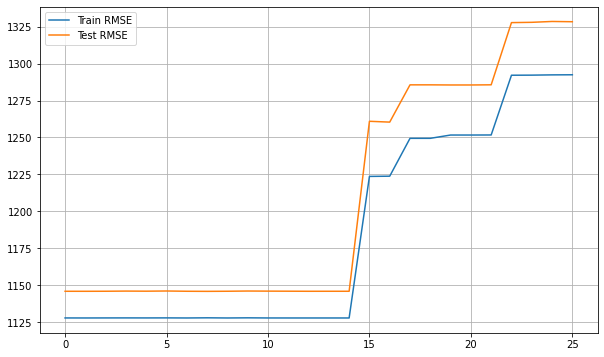

In [205]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
        Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

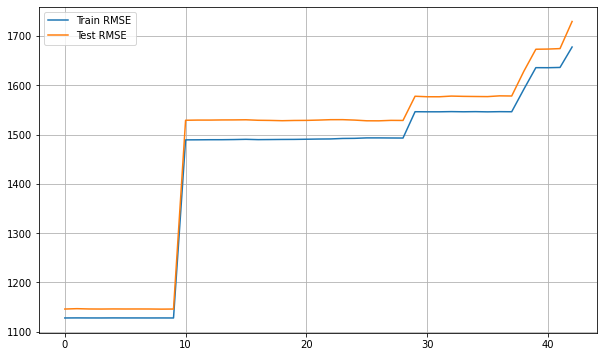

In [206]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-4
for i in range(m):
    lm = LinearRegression()
    lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X, Train_Y)

    Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
    a = Train_xy.columns.values.tolist()
    a.remove(target)

    API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
    DROP.append(vif.loc[0][0])
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
        
# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

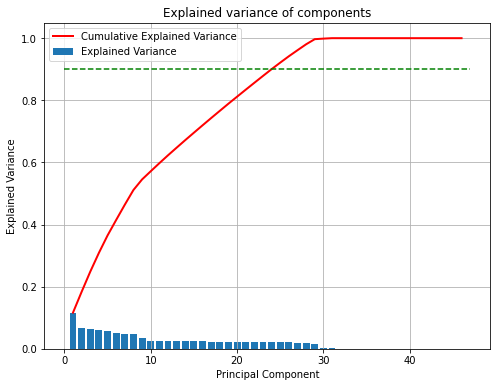

In [207]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

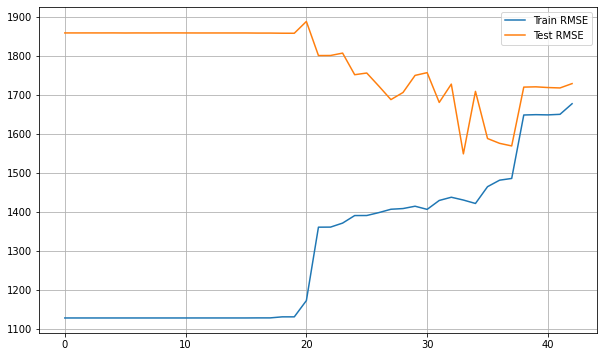

In [208]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

#### Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping few features using manual VIF Technique.

In [212]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
DROP=[];b=[]

for i in range(14):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
LR = LinearRegression()
LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
print(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
print(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

Train_X_std = Train_X_std.drop(DROP,axis=1)
Test_X_std = Test_X_std.drop(DROP, axis=1)

print('Dropped Features --> ',DROP)

1127.77
1145.86
Dropped Features -->  ['Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT018', 'Outlet_Establishment_Year_2009', 'Outlet_Identifier_OUT019', 'Outlet_Establishment_Year_2007', 'Outlet_Identifier_OUT027', 'Outlet_Establishment_Year_2004', 'Outlet_Identifier_OUT035', 'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1987', 'Outlet_Identifier_OUT046', 'Outlet_Type_Supermarket_Type3']


---

# <center> 6. Predictive Modelling

In [229]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(nf,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.80436758e-01 -2.29901144e+01  9.75596980e+02  1.52958494e+03
  2.29990998e+01  7.40437410e+01  5.74728781e+01  8.70311414e+02
 -5.40543782e+02  4.77287933e+01  6.21121259e+01  1.25566834e+01
  4.88322947e+00 -2.62422282e+01 -4.88489038e+02 -4.95373445e+01
 -4.88489038e+02  6.70499004e+00  2.13672387e+00  7.79159624e+00
 -1.10941723e+01  3.61313322e-01  1.68914280e+01  1.93733679e+00
 -7.16391101e+00 -3.09876403e+00  1.31090200e+00 -5.07351666e+00
  1.91982402e+01  1.71211287e+00  6.12019152e+00  1.03479640e+01]
The Intercept of the Regresion Model was found to be  2198.673634492018


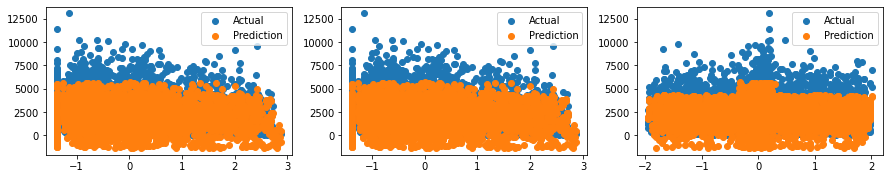



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.56
Residual Sum of Squares (RSS) on Training set  ---> 8525261681.75
Mean Squared Error (MSE) on Training set       ---> 1271857.63
Root Mean Squared Error (RMSE) on Training set ---> 1127.77

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.57
Residual Sum of Squares (RSS) on Training set  ---> 2200578019.07
Mean Squared Error (MSE) on Training set       ---> 1312994.04
Root Mean Squared Error (RMSE) on Training set ---> 1145.86

--------------------Residual Plots--------------------


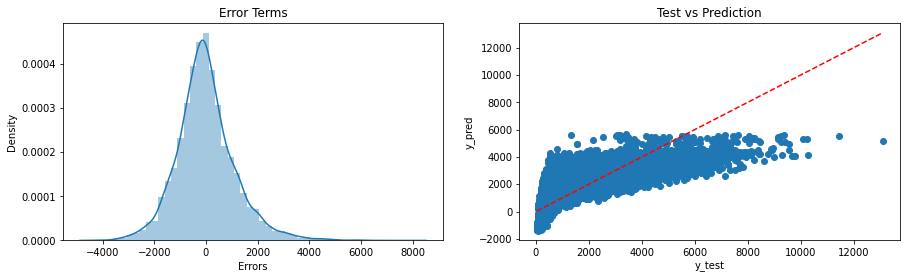

In [230]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.80436758e-01 -2.29901144e+01  9.75596980e+02  1.52958494e+03
  2.29990998e+01  7.40437410e+01  5.74728781e+01  8.70311414e+02
 -5.40543782e+02  4.77287933e+01  6.21121259e+01  1.25566834e+01
  4.88322947e+00 -2.62422282e+01 -4.88489038e+02 -4.95373445e+01
 -4.88489038e+02  6.70499004e+00  2.13672387e+00  7.79159624e+00
 -1.10941723e+01  3.61313322e-01  1.68914280e+01  1.93733679e+00
 -7.16391101e+00 -3.09876403e+00  1.31090200e+00 -5.07351666e+00
  1.91982402e+01  1.71211287e+00  6.12019152e+00  1.03479640e+01]
The Intercept of the Regresion Model was found to be  2198.673634492018


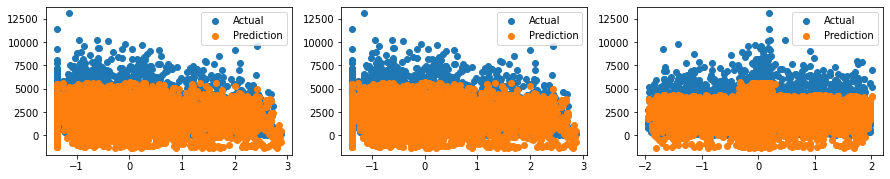



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.56
Residual Sum of Squares (RSS) on Training set  ---> 8525271592.91
Mean Squared Error (MSE) on Training set       ---> 1271859.11
Root Mean Squared Error (RMSE) on Training set ---> 1127.77

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.57
Residual Sum of Squares (RSS) on Training set  ---> 2200735645.81
Mean Squared Error (MSE) on Training set       ---> 1313088.09
Root Mean Squared Error (RMSE) on Training set ---> 1145.9

--------------------Residual Plots--------------------


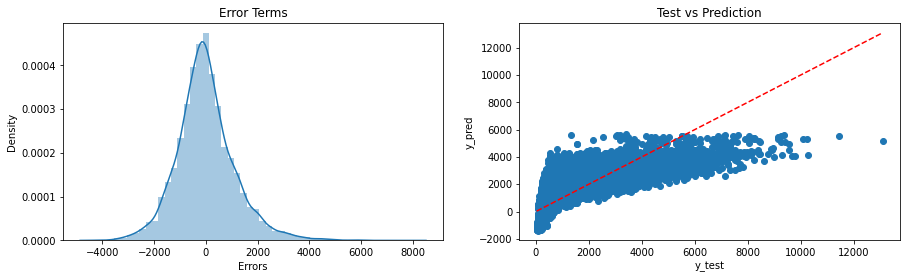

In [231]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.80436758e-01 -2.29901144e+01  9.75596980e+02  1.52958494e+03
  2.29990998e+01  7.40437410e+01  5.74728781e+01  8.70311414e+02
 -5.40543782e+02  4.77287933e+01  6.21121259e+01  1.25566834e+01
  4.88322947e+00 -2.62422282e+01 -4.88489038e+02 -4.95373445e+01
 -4.88489038e+02  6.70499004e+00  2.13672387e+00  7.79159624e+00
 -1.10941723e+01  3.61313322e-01  1.68914280e+01  1.93733679e+00
 -7.16391101e+00 -3.09876403e+00  1.31090200e+00 -5.07351666e+00
  1.91982402e+01  1.71211287e+00  6.12019152e+00  1.03479640e+01]
The Intercept of the Regresion Model was found to be  2198.673634492018


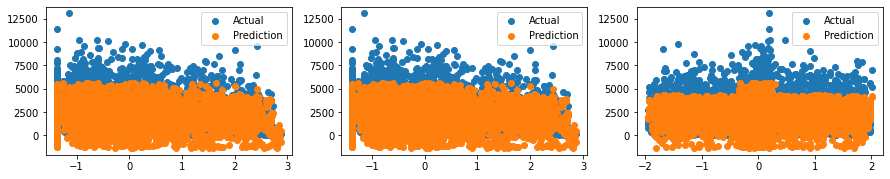



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.56
Residual Sum of Squares (RSS) on Training set  ---> 8525973966.39
Mean Squared Error (MSE) on Training set       ---> 1271963.89
Root Mean Squared Error (RMSE) on Training set ---> 1127.81

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.57
Residual Sum of Squares (RSS) on Training set  ---> 2199681480.42
Mean Squared Error (MSE) on Training set       ---> 1312459.12
Root Mean Squared Error (RMSE) on Training set ---> 1145.63

--------------------Residual Plots--------------------


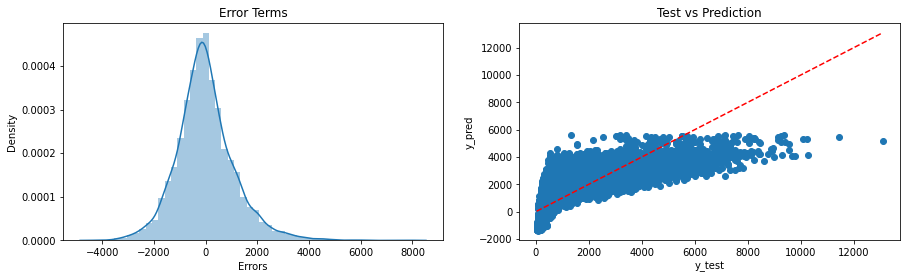

In [232]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.80436758e-01 -2.29901144e+01  9.75596980e+02  1.52958494e+03
  2.29990998e+01  7.40437410e+01  5.74728781e+01  8.70311414e+02
 -5.40543782e+02  4.77287933e+01  6.21121259e+01  1.25566834e+01
  4.88322947e+00 -2.62422282e+01 -4.88489038e+02 -4.95373445e+01
 -4.88489038e+02  6.70499004e+00  2.13672387e+00  7.79159624e+00
 -1.10941723e+01  3.61313322e-01  1.68914280e+01  1.93733679e+00
 -7.16391101e+00 -3.09876403e+00  1.31090200e+00 -5.07351666e+00
  1.91982402e+01  1.71211287e+00  6.12019152e+00  1.03479640e+01]
The Intercept of the Regresion Model was found to be  2198.673634492018


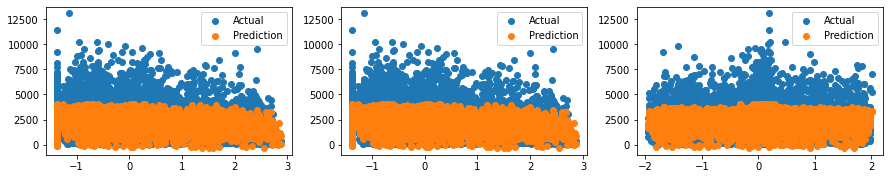



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.44
Residual Sum of Squares (RSS) on Training set  ---> 10788441642.3
Mean Squared Error (MSE) on Training set       ---> 1609494.5
Root Mean Squared Error (RMSE) on Training set ---> 1268.66

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.44
Residual Sum of Squares (RSS) on Training set  ---> 2879199966.87
Mean Squared Error (MSE) on Training set       ---> 1717899.74
Root Mean Squared Error (RMSE) on Training set ---> 1310.69

--------------------Residual Plots--------------------


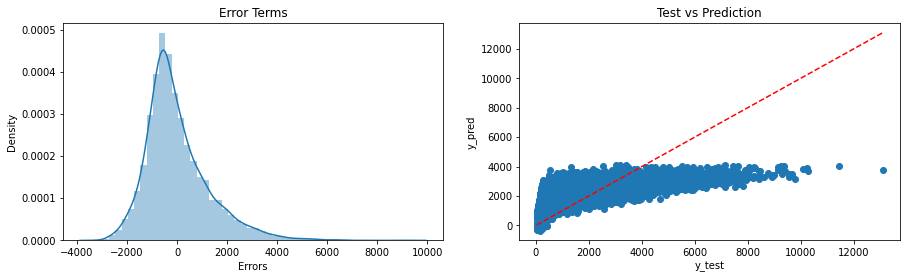

In [233]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

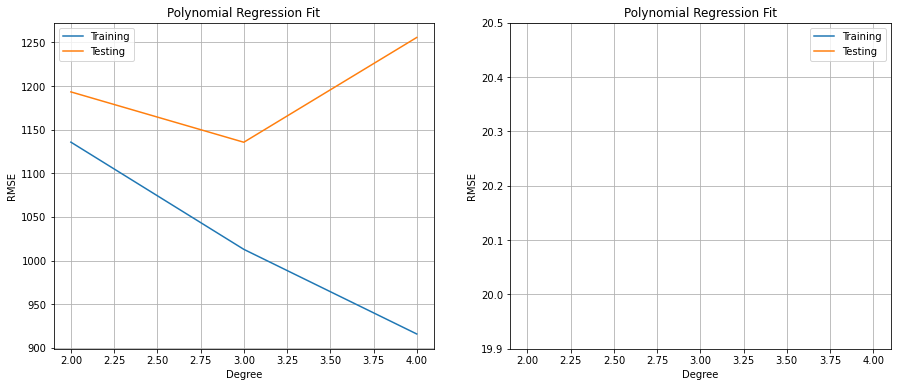

In [234]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = ElasticNet()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([19.9,20.5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 3rd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.80436758e-01 -2.29901144e+01  9.75596980e+02  1.52958494e+03
  2.29990998e+01  7.40437410e+01  5.74728781e+01  8.70311414e+02
 -5.40543782e+02  4.77287933e+01  6.21121259e+01  1.25566834e+01
  4.88322947e+00 -2.62422282e+01 -4.88489038e+02 -4.95373445e+01
 -4.88489038e+02  6.70499004e+00  2.13672387e+00  7.79159624e+00
 -1.10941723e+01  3.61313322e-01  1.68914280e+01  1.93733679e+00
 -7.16391101e+00 -3.09876403e+00  1.31090200e+00 -5.07351666e+00
  1.91982402e+01  1.71211287e+00  6.12019152e+00  1.03479640e+01]
The Intercept of the Regresion Model was found to be  2198.673634492018


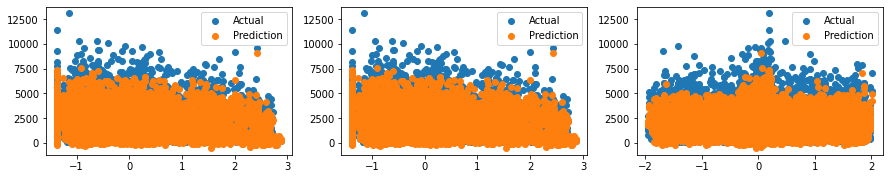



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.64
Residual Sum of Squares (RSS) on Training set  ---> 6876254434.41
Mean Squared Error (MSE) on Training set       ---> 1025847.3
Root Mean Squared Error (RMSE) on Training set ---> 1012.84

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.58
Residual Sum of Squares (RSS) on Training set  ---> 2161480942.02
Mean Squared Error (MSE) on Training set       ---> 1289666.43
Root Mean Squared Error (RMSE) on Training set ---> 1135.63

--------------------Residual Plots--------------------


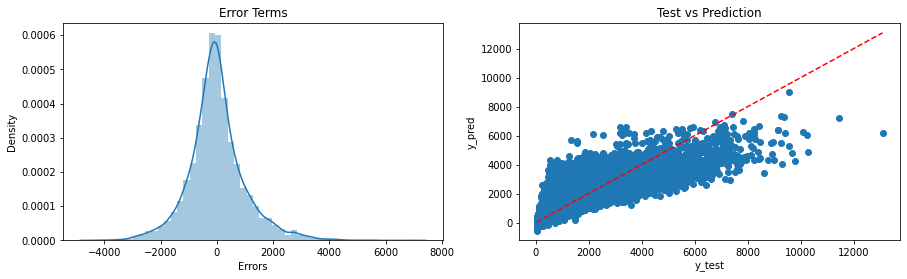

In [236]:
#Using the 4rd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = ElasticNet()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [237]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.56,0.57,8.525262e+09,2.200578e+09,1271857.63,1312994.04,1127.77,1145.86
Ridge Linear Regression (RLR),0.56,0.57,8.525272e+09,2.200736e+09,1271859.11,1313088.09,1127.77,1145.90
Lasso Linear Regression (LLR),0.56,0.57,8.525974e+09,2.199681e+09,1271963.89,1312459.12,1127.81,1145.63
Elastic-Net Regression (ENR),0.44,0.44,1.078844e+10,2.879200e+09,1609494.50,1717899.74,1268.66,1310.69
Polynomial Regression (PNR),0.64,0.58,6.876254e+09,2.161481e+09,1025847.30,1289666.43,1012.84,1135.63


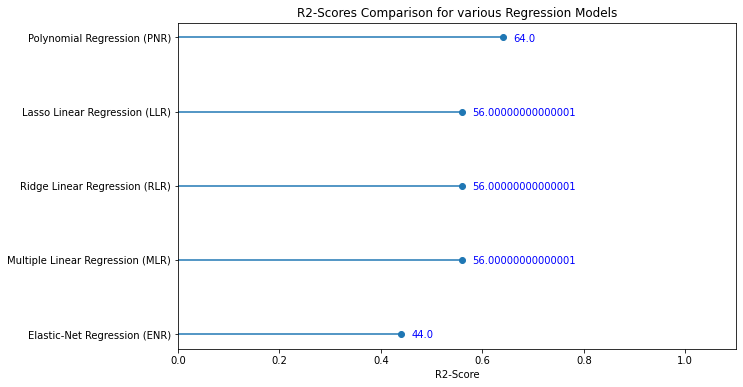

In [238]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

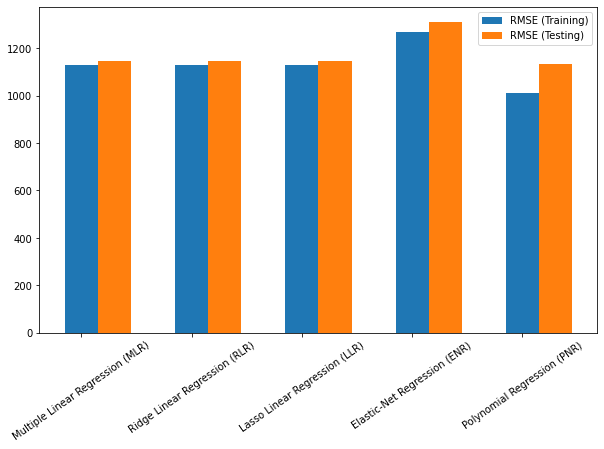

In [239]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.legend()
plt.show()

**Inference:** The polynomial regression slightly overfits on the data.
For this problem, it is can be said that any simple regression can be a good choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 8523 samples & after preprocessing 1.7% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-3) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>